# ======================================================================
#
#         Script to get lat/lon from shapefiles
#
# ======================================================================

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import cartopy.io.shapereader as shpreader
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import calendar
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import os
from os.path import isfile, join
import xarray as xr
from os import listdir
import csv


import geopandas as gpd
import geopandas

%matplotlib inline

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [3]:
# ---- function to return lat/lon -------
def getXY(pt):
    return (pt.x, pt.y)

In [3]:
# --------------- list directorties in NorWest data folder ------------
dir_top = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/'
directory_regions = [dI for dI in os.listdir(dir_top) if os.path.isdir(os.path.join(dir_top,dI))]

In [5]:
# ------------------------------------------------------------
#           Upload PNW Reservoir Information
# ------------------------------------------------------------

lat_lon_pnw = pd.read_csv('/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/misc/latlon_reservoirs.csv')
lat_lon_pnw.columns = (['site_id','lat','lon'])

In [20]:
path1 = '/raid3/rniemeyr/RBM/data/reservoirs/GRanD/dams'
#path1 = '/raid3/rniemeyr/RBM/data/reservoirs/GRanD/reservoirs'
grand = geopandas.GeoDataFrame.from_file(path1)    
#grand = grand.to_crs(crs={'proj': 'latlon'})


In [23]:
grand.ix[1]

ADMIN_UNIT                                                Yukon
ALT_CITY                                                   None
ALT_HGT_M                                                   -99
ALT_LEN_M                                                   -99
ALT_NAME                                                   None
ALT_RIVER                                                  None
ALT_YEAR                                                    -99
AREA_MAX                                                    -99
AREA_MIN                                                    -99
AREA_POLY                                                  92.5
AREA_REP                                                     95
AREA_SKM                                                   92.5
CAP_MAX                                                     -99
CAP_MCM                                                   264.8
CAP_MIN                                                     -99
CAP_REP                                 

In [19]:
grand

,AREA_SKM,GRAND_ID,POLY_SRC,geometry
0,2.1,1,SWBD,"POLYGON ((-153.0364289324964 57.6163888888892,..."
1,92.5,2,McGill,POLYGON ((-135.0166562270408 63.78016144614742...
2,4.4,3,SWBD,POLYGON ((-135.1855555555563 57.06277777777749...
3,3.9,4,SWBD,POLYGON ((-135.0261111111118 56.96916666666637...
4,5.3,5,SWBD,POLYGON ((-133.7277777777755 58.16611111111126...
5,1623.9,6,SWBD,POLYGON ((-123.1086283931532 55.13921200623468...
6,8.4,7,McGill,POLYGON ((-121.9958706778642 55.98181888342009...
7,5.1,8,SWBD,POLYGON ((-131.2941666666642 55.59527777777771...
8,0.6,9,SWBD,POLYGON ((-129.8576053173878 55.44522529511582...
9,0.8,10,SWBD,POLYGON ((-131.5247222222197 55.37361111111103...


In [8]:
dir_top = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/'

# ------------- Washington -----------
areax = 'WACoast'
path1 = dir_top + areax
print(path1)
wa_coast = geopandas.GeoDataFrame.from_file(path1)    
wa_coast = wa_coast.to_crs(crs={'proj': 'latlon'})
print(wa_coast)

/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/WACoast
           COMID                         GNIS_NAME  OBSPRED_ID  PERMA_FID  \
0     23850447.0                    Chehalis River        3300      20005   
1     23850447.0                    Chehalis River        3337      20005   
2     23850447.0                    Chehalis River        3371      20005   
3     23850447.0                    Chehalis River        3428      20005   
4     23864404.0                     Naselle River        3302      20010   
5     23864404.0                     Naselle River        3338      20010   
6     23864404.0                     Naselle River        3372      20010   
7     23864654.0                        Fork Creek        3265        106   
8     23864670.0                     Willapa River        3263        103   
9     23864632.0                     Willapa River        3262        102   
10    23864308.0                       Bear Branch        3344        105   

In [6]:
# --------------------------------------------------------------------
#     Read in each each site 
# --------------------------------------------------------------------

dir_top = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/'

# ------------- Washington -----------
areax = 'WACoast'
path1 = dir_top + areax
wa_coast = geopandas.GeoDataFrame.from_file(path1)    
wa_coast = wa_coast.to_crs(crs={'proj': 'latlon'})
centroidseries = wa_coast['geometry'].centroid
wa_coast_lon,wa_coast_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Central CA -----------
areax = 'CentralCA'
path1 = dir_top + areax
central_ca = geopandas.GeoDataFrame.from_file(path1)    
central_ca = central_ca.to_crs(crs={'proj': 'latlon'})
centroidseries = central_ca['geometry'].centroid
central_ca_lon,central_ca_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Clearwater -----------
areax = 'Clearwater'
path1 = dir_top + areax
clearwater = geopandas.GeoDataFrame.from_file(path1)    
clearwater = clearwater.to_crs(crs={'proj': 'latlon'})
centroidseries = clearwater['geometry'].centroid
clearwater_lon,clearwater_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Coastal California -----------
areax = 'CoastalCA'
path1 = dir_top + areax
coastal_CA = geopandas.GeoDataFrame.from_file(path1)    
coastal_CA = coastal_CA.to_crs(crs={'proj': 'latlon'})
centroidseries = coastal_CA['geometry'].centroid
coastal_CA_lon,coastal_CA_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Klamath Northern California -----------
areax = 'KlamathNorthernCA'
path1 = dir_top + areax
klam_NorCA = geopandas.GeoDataFrame.from_file(path1)    
klam_NorCA = klam_NorCA.to_crs(crs={'proj': 'latlon'})
centroidseries = klam_NorCA['geometry'].centroid
klam_NorCA_lon,klam_NorCA_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Lahontan -----------
areax = 'Lahontan'
path1 = dir_top + areax
lahontan = geopandas.GeoDataFrame.from_file(path1)    
lahontan = lahontan.to_crs(crs={'proj': 'latlon'})
centroidseries = lahontan['geometry'].centroid
lahontan_lon,lahontan_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Oregon - MidColumbia -----------
areax = 'MidColumbia'
path1 = dir_top + areax
mid_columbia = geopandas.GeoDataFrame.from_file(path1)    
mid_columbia = mid_columbia.to_crs(crs={'proj': 'latlon'})
centroidseries = mid_columbia['geometry'].centroid
mid_columbia_lon,mid_columbia_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Middle Snake -----------
areax = 'MidSnake'
path1 = dir_top + areax
mid_snake = geopandas.GeoDataFrame.from_file(path1)    
mid_snake = mid_snake.to_crs(crs={'proj': 'latlon'})
centroidseries = mid_snake['geometry'].centroid
mid_snake_lon,mid_snake_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Missiour - headwater -----------
dir_top = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/'
areax = 'MissouriHW'
path1 = dir_top + areax
miss_hw = geopandas.GeoDataFrame.from_file(path1)    
miss_hw = miss_hw.to_crs(crs={'proj': 'latlon'})
centroidseries = miss_hw['geometry'].centroid
miss_hw_lon,miss_hw_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Oregon - Coast -----------
areax = 'ORCoast'
path1 = dir_top + areax
or_coast = geopandas.GeoDataFrame.from_file(path1)    
or_coast = or_coast.to_crs(crs={'proj': 'latlon'})
centroidseries = or_coast['geometry'].centroid
or_coast_lon,or_coast_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Oregon - South Central -----------
areax = 'ORSouthCentral'
path1 = dir_top + areax
or_south = geopandas.GeoDataFrame.from_file(path1)    
or_south = or_south.to_crs(crs={'proj': 'latlon'})
centroidseries = or_south['geometry'].centroid
or_south_lon,or_south_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Salmon (Idaho) -----------
areax = 'Salmon'
path1 = dir_top + areax
salmon = geopandas.GeoDataFrame.from_file(path1)    
salmon = salmon.to_crs(crs={'proj': 'latlon'})
centroidseries = salmon['geometry'].centroid
salmon_lon,salmon_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Spokoot (WA/Idaho) -----------
areax = 'Spokoot'
path1 = dir_top + areax
spokoot = geopandas.GeoDataFrame.from_file(path1)    
spokoot = spokoot.to_crs(crs={'proj': 'latlon'})
centroidseries = spokoot['geometry'].centroid
spokoot_lon,spokoot_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Snake/Bear (WA/Idaho) -----------
areax = 'SnakeBear'
path1 = dir_top + areax
snakebear = geopandas.GeoDataFrame.from_file(path1)    
snakebear = snakebear.to_crs(crs={'proj': 'latlon'})
centroidseries = snakebear['geometry'].centroid
snakebear_lon,snakebear_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------- Yakima/Upper Columbia example -----------
areax = 'UppColumbiaYakima'
path1 = dir_top + areax
up_yakima = geopandas.GeoDataFrame.from_file(path1)    
up_yakima = up_yakima.to_crs(crs={'proj': 'latlon'})
centroidseries = up_yakima['geometry'].centroid
yakima_lon,yakima_lat = [list(t) for t in zip(*map(getXY, centroidseries))]

# ------------------------------------------------------
#          extract IDs
### NOTE: NorWest project has site IDS and a unique ID for each site and year, which is the ID attached to the temperature, so we need to get list of the site/year IDs for each site ID
# ------------------------------------------------------


In [71]:
# ============================================================================================
#            Write dictionary to a csv
# ============================================================================================
def GetMaxLength(flows):        
    maks=max(flows, key=lambda k: len(flows[k]))
    return len(flows[maks]), maks
max_len = GetMaxLength(dict_id)[0]

merged_data = pd.DataFrame()
for i in range(len(dict_id.keys())):
    codex = list(dict_id.keys())[i]
    x = dict_id[codex]
    y_len = 20 - len(x.values)
    x2  =  list(x.values) + list(np.repeat("NaN", int(y_len)))
    x2 = [str(codex[0])] + [str(codex[1])] + x2
    x2 = pd.DataFrame(x2)
    merged_data = merged_data.append(x2.transpose())

In [73]:
# =================================================================================
#       get the site/year IDs for the site ID
# =================================================================================

# ------------- Washington -----------
#  --- get the site IDs -------
perma_fid = list(wa_coast['PERMA_FID'].unique())
#  -- get the year/site IDs -----
dict_id = {}
for i in range(len(perma_fid)):
    x = wa_coast['OBSPRED_ID'][wa_coast['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'WACoast'] = x
    
# ------------- Central CA -----------
#  --- get the site IDs -------
perma_fid = list(central_ca['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = central_ca['OBSPRED_ID'][central_ca['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]),'CentralCA' ] = x

# ------------- Clearwater -----------
#  --- get the site IDs -------
perma_fid = list(clearwater['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = clearwater['OBSPRED_ID'][clearwater['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'Clearwater'] = x
    
# ------------- Coastal California -----------
#  --- get the site IDs -------
perma_fid = list(coastal_CA['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = coastal_CA['OBSPRED_ID'][coastal_CA['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'CoastalCA'] = x

# ------------- Klamath Northern California -----------
#  --- get the site IDs -------
perma_fid = list(klam_NorCA['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = klam_NorCA['OBSPRED_ID'][klam_NorCA['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'KlamathNorthernCA'] = x
    
# ------------- Lahontan -----------
#  --- get the site IDs -------
perma_fid = list(lahontan['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = lahontan['OBSPRED_ID'][lahontan['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'Lahontan'] = x
    
# ------------- Oregon - MidColumbia -----------
#  --- get the site IDs -------
perma_fid = list(mid_columbia['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = mid_columbia['OBSPRED_ID'][mid_columbia['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'MidColumbia'] = x
    
# ------------- Middle Snake -----------
#  --- get the site IDs -------
perma_fid = list(mid_snake['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = mid_snake['OBSPRED_ID'][mid_snake['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'MidSnake'] = x
    
# ------------- Missiour - headwater -----------
#  --- get the site IDs -------
perma_fid = list(miss_hw['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = miss_hw['OBSPRED_ID'][miss_hw['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'MissouriHW'] = x
    
# ------------- Oregon - Coast -----------
#  --- get the site IDs -------
perma_fid = list(or_coast['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = or_coast['OBSPRED_ID'][or_coast['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'ORCoast'] = x
    
# ------------- Oregon - South Central -----------
#  --- get the site IDs -------
perma_fid = list(or_south['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = or_south['OBSPRED_ID'][or_south['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'ORSouthCentral'] = x
    
# ------------- Salmon (Idaho) -----------
#  --- get the site IDs -------
perma_fid = list(salmon['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = salmon['OBSPRED_ID'][salmon['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'Salmon'] = x
    
# ------------- Spokoot (WA/Idaho) -----------
#  --- get the site IDs -------
perma_fid = list(spokoot['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = spokoot['OBSPRED_ID'][spokoot['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]),'SnakeBear'] = x

# ------------- Snake/Bear (WA/Idaho) -----------
#  --- get the site IDs -------
perma_fid = list(snakebear['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = snakebear['OBSPRED_ID'][snakebear['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'Spokoot'] = x
    
# ------------- Yakima/Upper Columbia example -----------
#  --- get the site IDs -------
perma_fid = list(up_yakima['PERMA_FID'].unique())
#  -- get the year/site IDs -----
for i in range(len(perma_fid)):
    x = up_yakima['OBSPRED_ID'][up_yakima['PERMA_FID']==perma_fid[i]]
    dict_id[str(perma_fid[i]), 'UppColumbiaYakima'] = x
    

In [80]:
# ============================================================================================
#            Write dictionary to a csv
# ============================================================================================
def GetMaxLength(flows):        
    maks=max(flows, key=lambda k: len(flows[k]))
    return len(flows[maks]), maks
max_len = GetMaxLength(dict_id)[0]

merged_data = pd.DataFrame()
for i in range(len(dict_id.keys())):
    codex = list(dict_id.keys())[i]
    x = dict_id[codex]
    y_len = max_len - len(x.values)
    x2  =  list(x.values) + list(np.repeat("NaN", int(y_len)))
    x2 = [str(codex[0])] + [str(codex[1])] + x2
    x2 = pd.DataFrame(x2)
    merged_data = merged_data.append(x2.transpose())

In [95]:
print(x2)

         0
0     9231
1   Salmon
2     3829
3     3830
4     3831
5     3832
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN


In [84]:
# ============================================================================================
#            Write the csv
# ============================================================================================

pathx = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/merged_data/NorWest_IDs_df.csv'
merged_data.to_csv(pathx)

In [92]:
merged_data.ix[0:1]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,23850,UppColumbiaYakima,997,1072,1122,1195,1265,1349,1427,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2332,MidColumbia,6789,6955,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,17614,Spokoot,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,29143,KlamathNorthernCA,3130,3188,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10727,Clearwater,3178,3179,3180,3181,3182,3183,3184,3185,...,3189,3190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,16021,UppColumbiaYakima,2263,2300,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13793,MissouriHW,743,769,803,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,27694,KlamathNorthernCA,2963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13723,MissouriHW,872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,11007,Salmon,2716,2717,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# ============================================================================================
#            Write dictionary to a csv
# ============================================================================================
def GetMaxLength(flows):        
    maks=max(flows, key=lambda k: len(flows[k]))
    return len(flows[maks]), maks
max_len = GetMaxLength(dict_id)[0]


merged_data = pd.DataFrame()
for i in range(len(dict_id.keys())):
    codex = str(list(dict_id.keys())[i])
    x = dict_id[codex]
    y_len = 20 - len(x.values)
    x2  =  list(x.values) + list(np.repeat("NaN", int(y_len)))
    x2 = list([str(codex)]) + x2
    #print('x2: ', x2)
    x2 = pd.DataFrame(x2)
    merged_data = merged_data.append(x2.transpose())

ValueError: negative dimensions are not allowed

In [106]:
pathx = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/merged_data/NorWest_IDs_df.csv'
merged_data.to_csv(pathx)

In [17]:
dict_id['25415']

340      1
341     10
342     24
343     39
344     61
345     86
346    122
347    172
348    243
349    312
350    383
351    461
352    524
353    594
354    661
355    731
356    785
357    837
358    887
359    981
Name: OBSPRED_ID, dtype: int64

In [45]:
# ---------------------------------------------
#        Practice!!!!
# ---------------------------------------------



# ------------------ read in OREGON NorWest excel files -----------------
stream_temp_NorWest_path = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps'
all_files = [f for f in listdir(stream_temp_NorWest_path) if isfile(join(stream_temp_NorWest_path, f))]
print(all_files)
data_norwest = pd.read_csv(stream_temp_NorWest_path + '/' + all_files[12])  
    # Oregon - pos 12, 
    
    
if 'SampleDate' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['SampleDate'], format='%m/%d/%Y %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'Date' in data_norwest.columns:
    data_norwest['Date'] =  pd.to_datetime(data_norwest['Date'], format='%Y-%m-%d')
    data_norwest = data_norwest.set_index(data_norwest['Date'])
    data_norwest['DATE'] = data_norwest['Date']
    data_norwest['DAILYMEAN'] = data_norwest['DailyMean']

['NorWeST_ObservedStreamTempDailySummaries_CentralCalifornia_AllDays.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_Clearwater.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_CoastalCalifornia_AllDays.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_KlamathNorthernCalifornia_AllDays.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_MiddleColumbia.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_MiddleSnake.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_MissouriHW.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_ORSouthCentral.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_Salmon.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_SnakeBear.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_Spokoot.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_UppColYak.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_OregonCoast_AllDays.txt', 'NorWeST_ObservedStreamTempDailySummaries_WACoa_PS.xlsx']


In [55]:
# ------------------ read in NorWest excel files -----------------
stream_temp_NorWest_path = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps'
all_files = [f for f in listdir(stream_temp_NorWest_path) if isfile(join(stream_temp_NorWest_path, f))]
print(all_files[11])
#data_norwest = pd.read_excel(stream_temp_NorWest_path + '/' + all_files[12])
# position 11 is Upper Yakima, position 4 - mid Columbia, Snake-Bear = position 9, WACoast - 13, midSnake - 5

# oregon data in .txt file    
pathx = stream_temp_NorWest_path + '/' + all_files[11]
print(pathx)
data_norwest = pd.read_excel(pathx)
    # Oregon - pos 12,

data_norwest.head()    

if 'SampleDate' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['SampleDate'], format='%Y-%m-%d %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'DATE' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['DATE'], format='%Y-%m-%d %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'Date' in data_norwest.columns:
    data_norwest['Date'] =  pd.to_datetime(data_norwest['Date'], format='%Y-%m-%d')
    data_norwest = data_norwest.set_index(data_norwest['Date'])
    data_norwest['DATE'] = data_norwest['Date']
    data_norwest['DAILYMEAN'] = data_norwest['DailyMean']

NorWeST_ObservedStreamTempDailySummaries_UppColYak.xlsx
/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps/NorWeST_ObservedStreamTempDailySummaries_UppColYak.xlsx


In [44]:
# ------------- practice extracting (see if it works ) ----------------


# ------------------ read in NorWest excel files -----------------
i = 11 # file

stream_temp_NorWest_path = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps'
all_files = [f for f in listdir(stream_temp_NorWest_path) if isfile(join(stream_temp_NorWest_path, f))]
print(all_files[i])
#data_norwest = pd.read_excel(stream_temp_NorWest_path + '/' + all_files[12])
   # position 11 is Upper Yakima, position 4 - mid Columbia, Snake-Bear = position 9, WACoast - 13, midSnake - 5

# oregon data in .txt file    
data_norwest = pd.read_table(stream_temp_NorWest_path + '/' + all_files[i], sep=',')
    # Oregon - pos 12,
    
if 'SampleDate' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['SampleDate'], format='%Y-%m-%d %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'DATE' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['SampleDate'], format='%Y-%m-%d %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'Date' in data_norwest.columns:
    data_norwest['Date'] =  pd.to_datetime(data_norwest['Date'], format='%Y-%m-%d')
    data_norwest = data_norwest.set_index(data_norwest['Date'])
    data_norwest['DATE'] = data_norwest['Date']
    data_norwest['DAILYMEAN'] = data_norwest['DailyMean']
    
    
    
#data_norwest = pd.read_csv(stream_temp_NorWest_path + '/' + all_files[12])  
    # Oregon - pos 12, 
data_norwest_downstream = data_norwest.loc[data_norwest['OBSPRED_ID'].isin(dict_id['20005'])]   
data_norwest_downstream['year'] = data_norwest_downstream.DATE.dt.year

    


NorWeST_ObservedStreamTempDailySummaries_UppColYak.xlsx


CParserError: Error tokenizing data. C error: Expected 1 fields in line 11, saw 2


In [39]:
all_files

['NorWeST_ObservedStreamTempDailySummaries_CentralCalifornia_AllDays.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_Clearwater.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_CoastalCalifornia_AllDays.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_KlamathNorthernCalifornia_AllDays.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_MiddleColumbia.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_MiddleSnake.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_MissouriHW.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_ORSouthCentral.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_Salmon.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_SnakeBear.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_Spokoot.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_UppColYak.xlsx',
 'NorWeST_ObservedStreamTempDailySummaries_OregonCoast_AllDays.txt',
 'NorWeST_ObservedStreamTempDailySummaries_WACoa_PS.xlsx']

In [18]:
wa_coast

,COMID,GNIS_NAME,OBSPRED_ID,PERMA_FID,SampleYear,Source,UOM,geometry
0,23850447.0,Chehalis River,3300,20005,2002,WAState_ECY_Headquarters,DegC,POINT (-123.2500233470425 46.63130190352643)
1,23850447.0,Chehalis River,3337,20005,2003,WAState_ECY_Headquarters,DegC,POINT (-123.2500233470425 46.63130190352643)
2,23850447.0,Chehalis River,3371,20005,2004,WAState_ECY_Headquarters,DegC,POINT (-123.2500233470425 46.63130190352643)
3,23850447.0,Chehalis River,3428,20005,2005,WAState_ECY_Headquarters,DegC,POINT (-123.2500233470425 46.63130190352643)
4,23864404.0,Naselle River,3302,20010,2002,WAState_ECY_Headquarters,DegC,POINT (-123.746794262096 46.37286733151835)
5,23864404.0,Naselle River,3338,20010,2003,WAState_ECY_Headquarters,DegC,POINT (-123.746794262096 46.37286733151835)
6,23864404.0,Naselle River,3372,20010,2004,WAState_ECY_Headquarters,DegC,POINT (-123.746794262096 46.37286733151835)
7,23864654.0,Fork Creek,3265,106,2001,WAState_ECY_Headquarters,DegC,POINT (-123.5936366261208 46.55822719439288)
8,23864670.0,Willapa River,3263,103,2001,WAState_ECY_Headquarters,DegC,POINT (-123.5613570743347 46.56233664340622)
9,23864632.0,Willapa River,3262,102,2001,WAState_ECY_Headquarters,DegC,POINT (-123.6228417725717 46.58579518828311)


# ------------------------------------------------------------------------------------
#
#     Code to write take flow direction file and establish site locations relative to reservoir
#     NOTE: code didn't work, flow direction file (1/16th deg) was too coarse
#
# ------------------------------------------------------------------------------------

In [7]:
def flow_dir_arrow(dirx):
    '''
    print arrow directions for flow direction values 
    '''
    x = 2
    dirx = int(dirx)
    if dirx == -9999:
        xdir = 0.000001
        ydir = 0
    if dirx == 0:
        xdir = 0.000001
        ydir = 0
    if dirx == 1:
        xdir = cellx/x
        ydir = 0
    if dirx == 2:
        xdir = cellx/x
        ydir = -cellx/x
    if dirx == 4:
        xdir = 0
        ydir = -cellx/x
    if dirx == 8:
        xdir = -cellx/x
        ydir = -cellx/x
    if dirx == 16:
        xdir = -cellx/x
        ydir = 0
    if dirx == 32:
        xdir = -cellx/x
        ydir = cellx/x        
    if dirx == 64:
        xdir = 0
        ydir = cellx/x
    if dirx == 128:
        xdir = cellx/x
        ydir = cellx/x
        
    return xdir, ydir

In [10]:
path_flow_dir = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/misc/flow_dir.asc'
ascii_grid = np.loadtxt(path_flow_dir, skiprows=6)
fdir_df = pd.DataFrame(ascii_grid)

In [11]:
# ---- just enter manually ---
ncolx = 5760
nrowx = 2240
xcornerx = -180.000000
ycornerx =-56.000000
cellx = 0.062500

# ----- western US region ------
lat0 = 50
lat1 = 32
lon0 = -126
lon1 = -109

In [12]:
flow_dir_global = xr.DataArray(fdir_df.as_matrix(), 
                               coords=[np.linspace( ycornerx+((nrowx-1)*cellx),ycornerx, nrowx), 
                                       np.linspace(xcornerx,xcornerx+((ncolx-1)*cellx), ncolx)], 
                               dims=['lat', 'lon'])
flow_dir_west = flow_dir_global.sel(lat=slice(lat0, lat1), lon=slice(lon0, lon1))

In [13]:
flow_dir_PNWcoast = flow_dir_global.sel(lat=slice(48.4, 47.0), lon=slice(-124.5, -122.5)) # more narrow area
flow_dir_PNWcoast = flow_dir_global.sel(lat=slice(48.8, 46.0), lon=slice(-122.5, -118.5)) # wider area
flow_dir_olympic = flow_dir_global.sel(lat=slice(49, 46.0), lon=slice(-125, -122)) # wider area
flow_dir_oregon = flow_dir_global.sel(lat=slice(46, 42.0), lon=slice(-124, -117)) # wider area

In [14]:
from matplotlib import colors

cmap = colors.ListedColormap(['grey','cyan','red', 'pink','magenta', 'orange','yellow', 'green',  'blue', 'purple'])
cmap = colors.ListedColormap(['grey',(0,1,0),(0.1,1,0), (0.2,1,0),(0.3,1,0), (0.4,1,0),(0.5,1,0), (0.6,1,0),  (0.7,1,0), (0.95,1,0)])
cmap = colors.ListedColormap(['grey',(0,1,0),(0.1,1,0.1), (0.2,1,0.2),(0.3,1,0.3), (0.4,1,0.4),(0.5,1,0.5), (0.6,1,0.6),  (0.7,1,0.7), (0.95,1,0.95)])

bounds=[-100,0,1,2,4,8,16,32,64,128]
bounds=[-100,-0.5,0.5,1.5,3,5,9,17,34,65,129]
norm = colors.BoundaryNorm(bounds, cmap.N)


In [15]:
# ------------- get list of colors to print ----------------
from __future__ import division
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


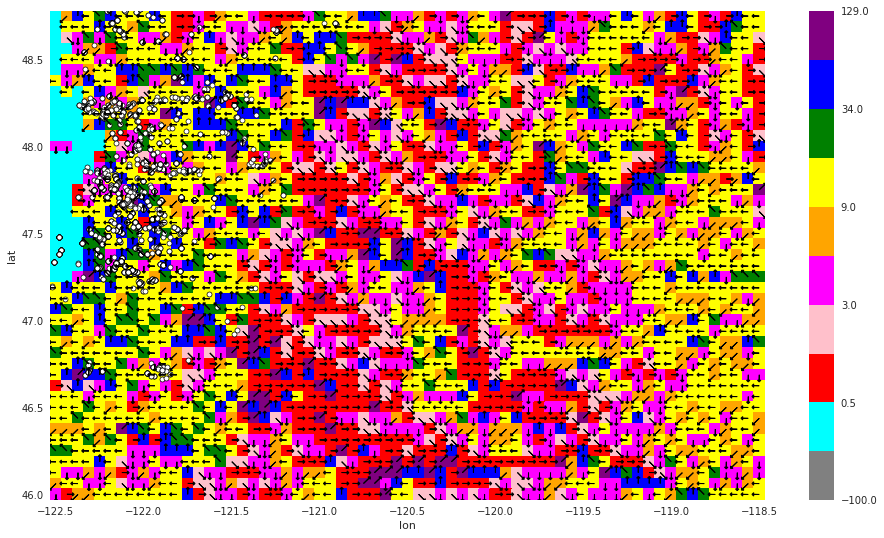

In [13]:
plt.figure(figsize=[16,9])
flow_dir_PNWcoast.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
#print('flow dir:',flow_dir_PNWcoast.lon[5],flow_dir_PNWcoast.lat[3])
for lat_cell in flow_dir_PNWcoast.lat:
    for lon_cell in flow_dir_PNWcoast.lon:
        dirx = flow_dir_PNWcoast.sel(lat=slice(lat_cell+0.01,lat_cell-0.01), lon=slice(lon_cell-0.01,lon_cell+0.01) )
        if int(dirx.values) > 0: 
            valuesx = flow_dir_arrow(dirx.values)
            #print('second try: ', dirx.lon, dirx.lat)
            plt.arrow(dirx.lon[0], dirx.lat[0],  valuesx[0], valuesx[1],
                     head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10) 
              #valuesx[0], 
            #valuesx[1])  #, 
    #                  head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
        
        
#plt.ylim([48.0,48.2])
#plt.xlim([-124.5,-123.5])
plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
            marker='o',markeredgecolor='black', color='white')

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


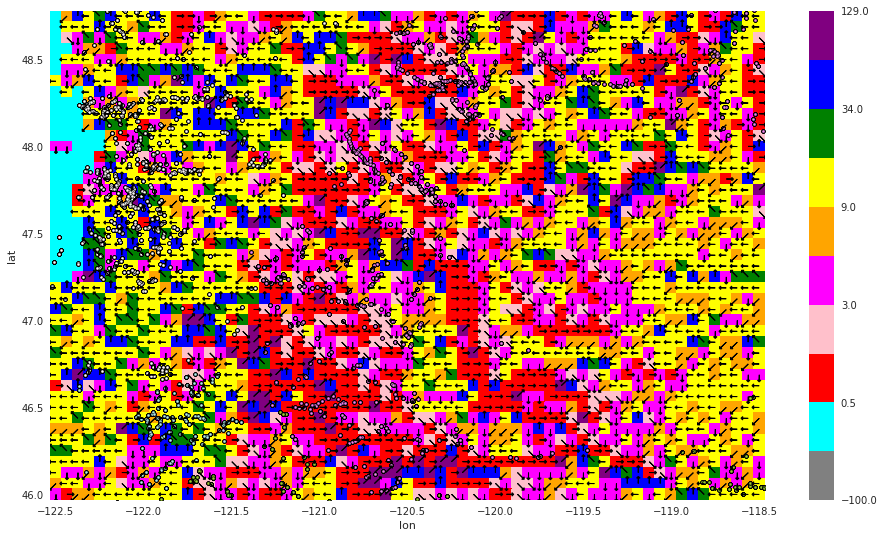

In [16]:
plt.figure(figsize=[16,9])
flow_dir_PNWcoast.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
#print('flow dir:',flow_dir_PNWcoast.lon[5],flow_dir_PNWcoast.lat[3])
for lat_cell in flow_dir_PNWcoast.lat:
    for lon_cell in flow_dir_PNWcoast.lon:
        dirx = flow_dir_PNWcoast.sel(lat=slice(lat_cell+0.01,lat_cell-0.01), lon=slice(lon_cell-0.01,lon_cell+0.01) )
        if int(dirx.values) > 0: 
            valuesx = flow_dir_arrow(dirx.values)
            #print('second try: ', dirx.lon, dirx.lat)
            plt.arrow(dirx.lon[0], dirx.lat[0],  valuesx[0], valuesx[1],
                     head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10) 
              #valuesx[0], 
            #valuesx[1])  #, 
    #                  head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
        
    # -------------------- cycle throug and plot all NorWest data --------------
    i = 6
    for folderx in directory_regions:
        if folderx != 'stream_temps':
            i = i + 9
            folderx2 = dir_top + folderx + '/'
            filesx =  [f for f in os.listdir(folderx2) if isfile(join(folderx2, f))]

            # ---------- read in shapefile ----------
            site_x = geopandas.GeoDataFrame.from_file(folderx2)    
            site_x = site_x.to_crs(crs={'proj': 'latlon'})
            centroidseries = site_x['geometry'].centroid
            site_x_lon,site_x_lat = [list(t) for t in zip(*map(getXY, centroidseries))]
            plt.plot(site_x_lon, site_x_lat,'s',zorder=4, markersize=3,markeredgewidth=0.4,
                 marker='o',markeredgecolor='black', color=by_hsv[i][1])

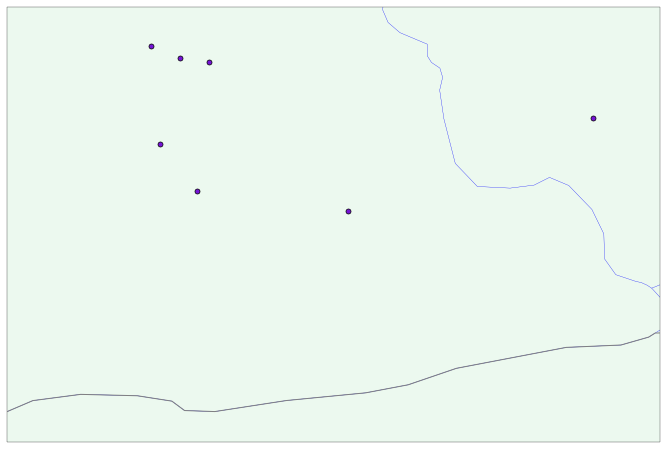

In [39]:
fig = plt.figure(figsize=(15,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-125, -109, 32, 50])  # Western US (all sites)
ax.set_extent([-122, -119, 45.5, 47.5])  # California

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m',
    facecolor='none')

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='gray')

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')

#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
ax.add_feature(rivers_lakes, edgecolor='blue')

plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=5,markeredgewidth=0.7,
         marker='o',markeredgecolor='black', color='#7514D5')

plt.show()

(-122, -119)

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


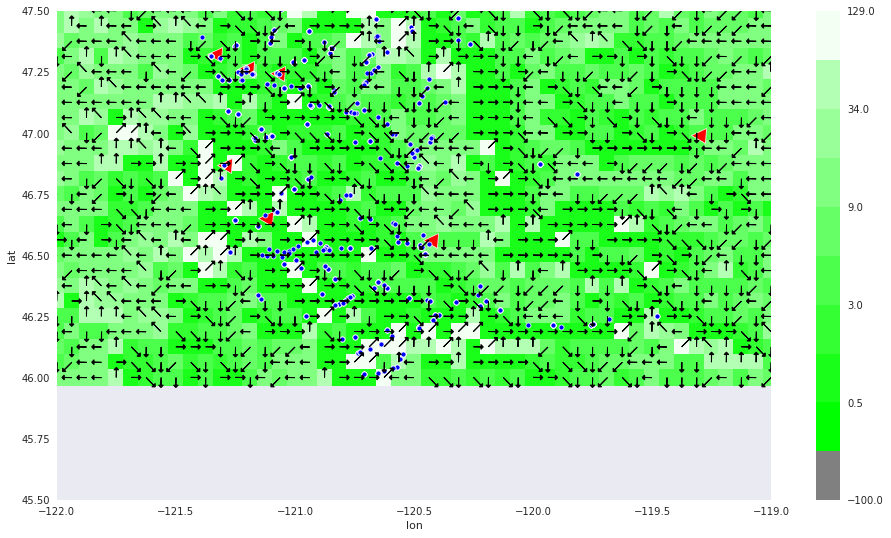

In [24]:
plt.figure(figsize=[16,9])
flow_dir_PNWcoast.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
#print('flow dir:',flow_dir_PNWcoast.lon[5],flow_dir_PNWcoast.lat[3])
for lat_cell in flow_dir_PNWcoast.lat:
    for lon_cell in flow_dir_PNWcoast.lon:
        dirx = flow_dir_PNWcoast.sel(lat=slice(lat_cell+0.01,lat_cell-0.01), lon=slice(lon_cell-0.01,lon_cell+0.01) )
        if int(dirx.values) > 0: 
            valuesx = flow_dir_arrow(dirx.values)
            #print('second try: ', dirx.lon, dirx.lat)
            plt.arrow(dirx.lon[0], dirx.lat[0],  valuesx[0], valuesx[1],
                     head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=11) 
              #valuesx[0], 
            #valuesx[1])  #, 
    #                  head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
plt.plot(yakima_lon, yakima_lat,'s',zorder=8, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='white', color='blue')
plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=15,markeredgewidth=0.7,
             marker='<',markeredgecolor='white', color='red')
#plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
#             marker='o',markeredgecolor='white', color='purple')

plt.ylim([45.5,47.5])
plt.xlim([-122,-119])

(-121.5, -120.8)

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


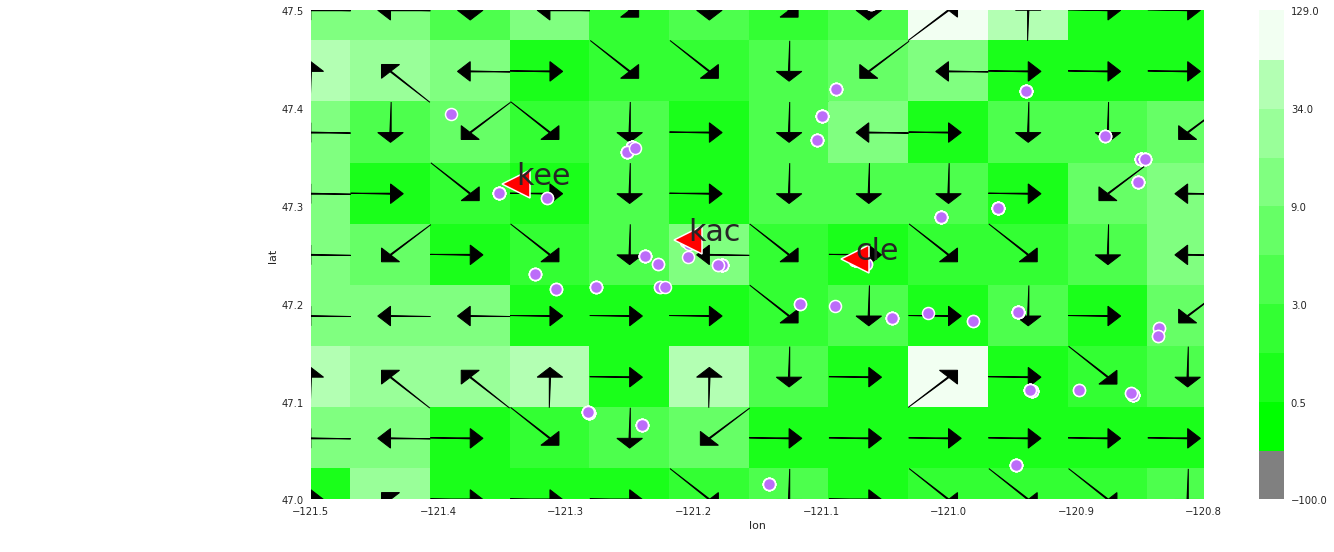

In [37]:
fig = plt.figure(figsize=[20,9])
flow_dir_PNWcoast.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
#print('flow dir:',flow_dir_PNWcoast.lon[5],flow_dir_PNWcoast.lat[3])
for lat_cell in flow_dir_PNWcoast.lat:
    for lon_cell in flow_dir_PNWcoast.lon:
        dirx = flow_dir_PNWcoast.sel(lat=slice(lat_cell+0.01,lat_cell-0.01), lon=slice(lon_cell-0.01,lon_cell+0.01) )
        if int(dirx.values) > 0: 
            valuesx = flow_dir_arrow(dirx.values)
            #print('second try: ', dirx.lon, dirx.lat)
            plt.arrow(dirx.lon[0]-valuesx[0], dirx.lat[0]-valuesx[1],  valuesx[0], valuesx[1],
                     head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=8) 
              #valuesx[0], 
            #valuesx[1])  #, 
    #                  head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
plt.plot(yakima_lon, yakima_lat,'s',zorder=9, markersize=12,markeredgewidth=1.5,
             marker='o',markeredgecolor='white', color='#BC6DF9')
plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=13, markersize=28,markeredgewidth=1.5,
             marker='<',markeredgecolor='white', color='red')

ax = fig.add_subplot(111)

for x, y, namex in zip(lat_lon_pnw['lon'], lat_lon_pnw['lat'],lat_lon_pnw['site_id'] ):                                       # <--
    ax.annotate('%s' % (namex), xy=(x,y), textcoords='data', zorder=15, fontsize=30) # <--
#plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
#             marker='o',markeredgecolor='white', color='purple')

plt.ylim([47,47.5])
plt.xlim([-121.5,-120.8])

(-121.5, -119.5)

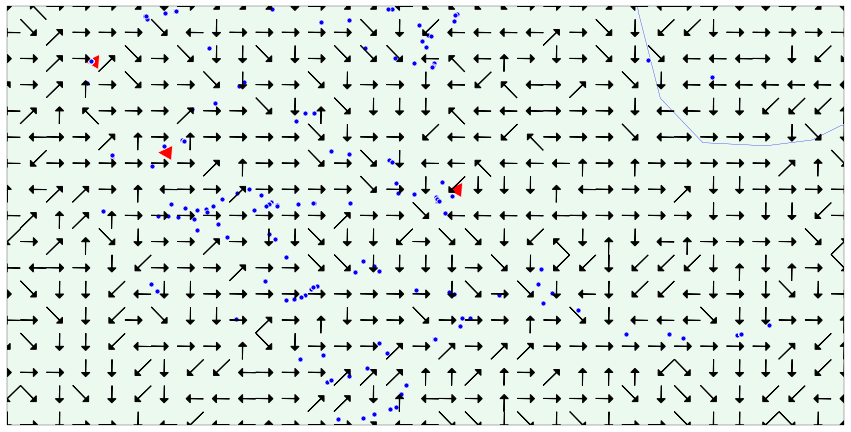

In [32]:
fig = plt.figure(figsize=(15,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-125, -109, 32, 50])  # Western US (all sites)
ax.set_extent([-122, -119, 45.5, 47.5])  # California

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m',
    facecolor='none')

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='gray')

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')

#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
ax.add_feature(rivers_lakes, edgecolor='blue')

for lat_cell in flow_dir_PNWcoast.lat:
    for lon_cell in flow_dir_PNWcoast.lon:
        dirx = flow_dir_PNWcoast.sel(lat=slice(lat_cell+0.01,lat_cell-0.01), lon=slice(lon_cell-0.01,lon_cell+0.01) )
        if int(dirx.values) > 0: 
            valuesx = flow_dir_arrow(dirx.values)
            #print('second try: ', dirx.lon, dirx.lat)
            plt.arrow(dirx.lon[0]-valuesx[0], dirx.lat[0]-valuesx[1],  valuesx[0], valuesx[1],
                     head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=11) 
              #valuesx[0], 
            #valuesx[1])  #, 
    #                  head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
plt.plot(yakima_lon, yakima_lat,'s',zorder=8, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='white', color='blue')
plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=15,markeredgewidth=0.7,
             marker='<',markeredgecolor='white', color='red')
#plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
#             marker='o',markeredgecolor='white', color='purple')

plt.ylim([46,47])
plt.xlim([-121.5,-119.5])

(-124, -123)

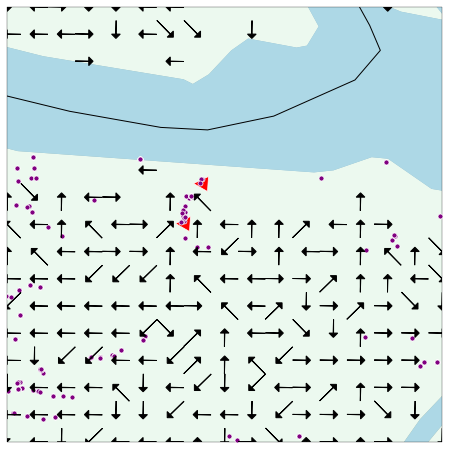

In [39]:
fig = plt.figure(figsize=(15,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-125, -109, 32, 50])  # Western US (all sites)
ax.set_extent([-122, -119, 45.5, 47.5])  # California

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m',
    facecolor='none')

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='gray')

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')

#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
ax.add_feature(rivers_lakes, edgecolor='blue')

for lat_cell in flow_dir_olympic.lat:
    for lon_cell in flow_dir_olympic.lon:
        dirx = flow_dir_olympic.sel(lat=slice(lat_cell+0.01,lat_cell-0.01), lon=slice(lon_cell-0.01,lon_cell+0.01) )
        if int(dirx.values) > 0: 
            valuesx = flow_dir_arrow(dirx.values)
            #print('second try: ', dirx.lon, dirx.lat)
            plt.arrow(dirx.lon[0]-valuesx[0], dirx.lat[0]-valuesx[1],  valuesx[0], valuesx[1],
                     head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=11) 
              #valuesx[0], 
            #valuesx[1])  #, 
    #                  head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
plt.plot(yakima_lon, yakima_lat,'s',zorder=8, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='white', color='blue')
plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=15,markeredgewidth=0.7,
             marker='<',markeredgecolor='white', color='red')
plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='white', color='purple')

plt.ylim([47.5,48.5])
plt.xlim([-124,-123])

(-122.3, -119.8)

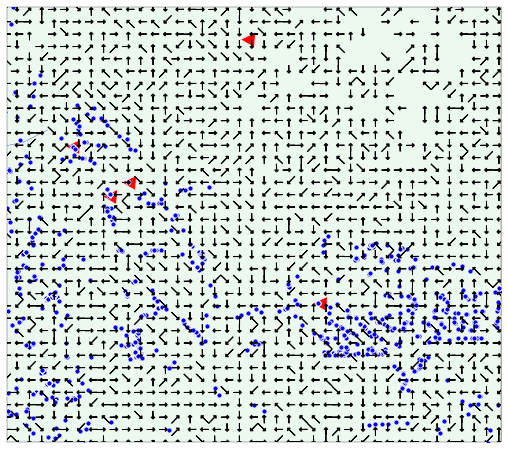

In [46]:
fig = plt.figure(figsize=(15,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-125, -109, 32, 50])  # Western US (all sites)
ax.set_extent([-122, -119, 45.5, 47.5])  # California

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m',
    facecolor='none')

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='gray')

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')

#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
ax.add_feature(rivers_lakes, edgecolor='blue')

for lat_cell in flow_dir_oregon.lat:
    for lon_cell in flow_dir_oregon.lon:
        dirx = flow_dir_oregon.sel(lat=slice(lat_cell+0.01,lat_cell-0.01), lon=slice(lon_cell-0.01,lon_cell+0.01) )
        if int(dirx.values) > 0: 
            valuesx = flow_dir_arrow(dirx.values)
            #print('second try: ', dirx.lon, dirx.lat)
            plt.arrow(dirx.lon[0]-valuesx[0], dirx.lat[0]-valuesx[1],  valuesx[0], valuesx[1],
                     head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=11) 
              #valuesx[0], 
            #valuesx[1])  #, 
    #                  head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
plt.plot(mid_columbia_lon, mid_columbia_lat,'s',zorder=8, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='white', color='blue')
plt.plot(or_coast_lon, or_coast_lat,'s',zorder=8, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='white', color='blue')
plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=15,markeredgewidth=0.7,
             marker='<',markeredgecolor='white', color='red')


mid_columbia

plt.ylim([45,42.8])
plt.xlim([-122.3,-119.8])


/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


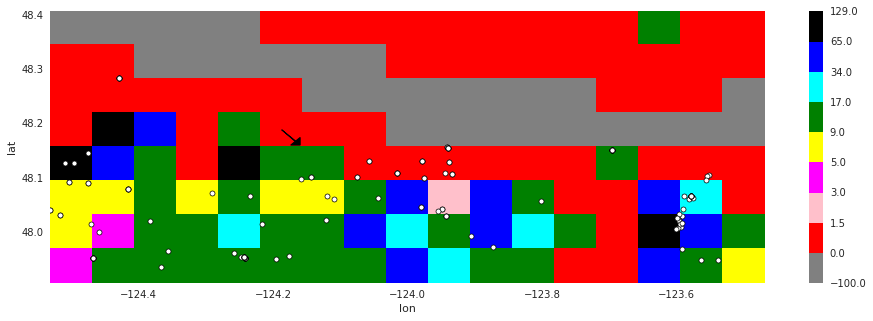

In [20]:
plt.figure(figsize=[16,5])
flow_dir_PNWcoast.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
#plt.ylim([47.9,48.4])
plt.arrow(flow_dir_PNWcoast.lon[5], 
          flow_dir_PNWcoast.lat[3], 
          cellx/3, 
          -cellx/3, head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
#plt.ylim([48.0,48.2])
#plt.xlim([-124.5,-123.5])
plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
            marker='o',markeredgecolor='black', color='white')

In [ ]:
plt.figure(figsize=[16,5])
flow_dir_PNWcoast.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
#plt.ylim([47.9,48.4])
for lat_cell in flow_dir_PNWcoast.lat:
    for lon_cell in flow_dir_PNWcoast.lon:
        

plt.arrow(flow_dir_PNWcoast.lon[5], 
          flow_dir_PNWcoast.lat[3], 
          cellx/2, 
          cellx/2, head_width=0.02,linewidth=1, head_length=0.01, fc='k', ec='k', zorder=10)
#plt.ylim([48.0,48.2])
#plt.xlim([-124.5,-123.5])
plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
            marker='o',markeredgecolor='black', color='white')

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


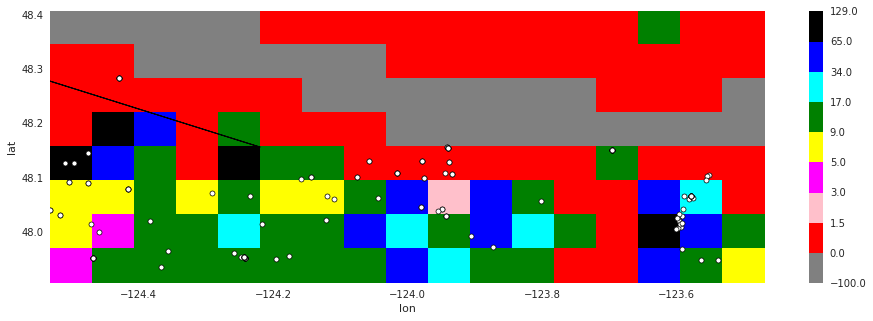

In [314]:
plt.figure(figsize=[16,5])
flow_dir_PNWcoast.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
#plt.ylim([47.9,48.4])
plt.arrow(flow_dir_PNWcoast.lon[5]-(cellx/2), 
          flow_dir_PNWcoast.lat[3]-(cellx/2), 
          flow_dir_PNWcoast.lon[5]+(cellx/2), 
          flow_dir_PNWcoast.lat[3]+(cellx/2), head_width=0.5,linewidth=1, head_length=0.1, fc='k', ec='k', zorder=10)
#plt.ylim([48.0,48.2])
#plt.xlim([-124.5,-123.5])
plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
            marker='o',markeredgecolor='black', color='white')

In [166]:
# ------------------------------------------------------------
#    Function to plot a color bar 
# ------------------------------------------------------------

# NOTE - the line doesn't s how up with a layer has a zorder > 1

def scale_bar(ax, length, utm_zone, adjx, adjy,location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    """
    #Projection in metres, need to change this to suit your own figure
    utm = ccrs.UTM(utm_zone)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    #Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    sbcx = sbcx + adjx  #I added adjx to adjust left or right
    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * 500, sbcx + length * 500 ] 
    #Plot the scalebar
    ax.plot(bar_xs, [sbcy, sbcy+adjy], transform=utm, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbcx, sbcy+(adjy/2), str(length) + ' km', transform=utm,
            horizontalalignment='center', verticalalignment='bottom')

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


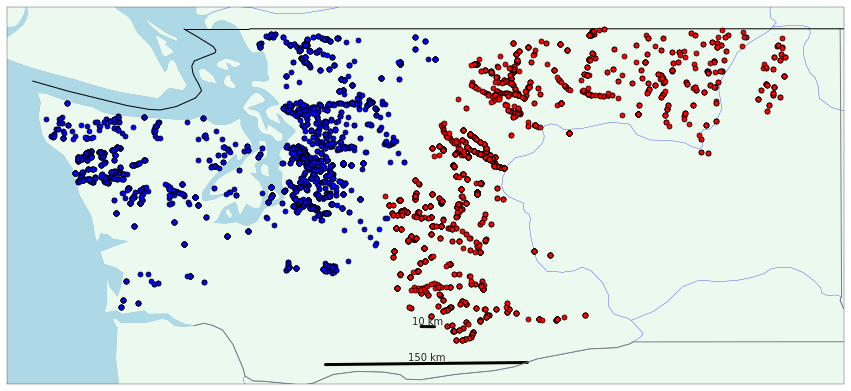

In [171]:
fig = plt.figure(figsize=(15,8))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-90, -80, 34, 38]) # TVA area
    #ax.set_extent([-125, -109, 32, 50])  # Western US
    ax.set_extent([-125, -117, 45.6, 49.2])  # Washington

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
    ax.add_feature(rivers_lakes, edgecolor='blue')
    
    plt.plot(yakima_lon, yakima_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='red')
    plt.plot(wa_coast_lon, wa_coast_lat,'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='blue')

    scale_bar(ax, 150, 10, 0, 6000)
    scale_bar(ax, 10, 10, 0, 100, location=(0.5, 0.15))
    
    plt.show()


if __name__ == '__main__':
    main()



In [124]:
# ------------- get list of colors to print ----------------
from __future__ import division
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())

In [145]:
col_names = []
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    col_names.append(name)

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


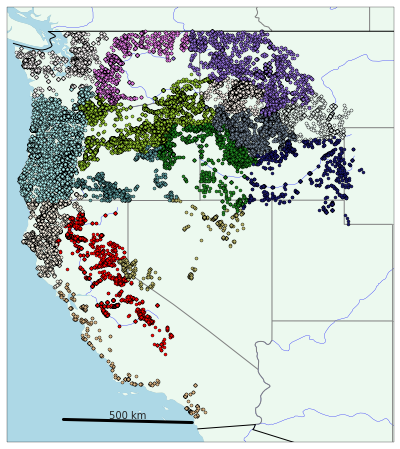

In [138]:
fig = plt.figure(figsize=(15,8))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-90, -80, 34, 38]) # TVA area
    ax.set_extent([-125, -109, 32, 50])  # Western US
    #ax.set_extent([-125, -115, 45, 49.5])  # Washington

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
    ax.add_feature(rivers_lakes, edgecolor='blue')
    
    # -------------------- cycle throug and plot all NorWest data --------------
    i = 6
    for folderx in directory_regions:
        if folderx != 'stream_temps':
            i = i + 9
            folderx2 = dir_top + folderx + '/'
            filesx =  [f for f in os.listdir(folderx2) if isfile(join(folderx2, f))]

            # ---------- read in shapefile ----------
            site_x = geopandas.GeoDataFrame.from_file(folderx2)    
            site_x = site_x.to_crs(crs={'proj': 'latlon'})
            centroidseries = site_x['geometry'].centroid
            site_x_lon,site_x_lat = [list(t) for t in zip(*map(getXY, centroidseries))]
            plt.plot(site_x_lon, site_x_lat,'s',zorder=4, markersize=3,markeredgewidth=0.4,
                 marker='o',markeredgecolor='black', color=by_hsv[i][1])
            
            

    scale_bar(ax, 500, 10, 0, 20)
    
    plt.show()


if __name__ == '__main__':
    main()



/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


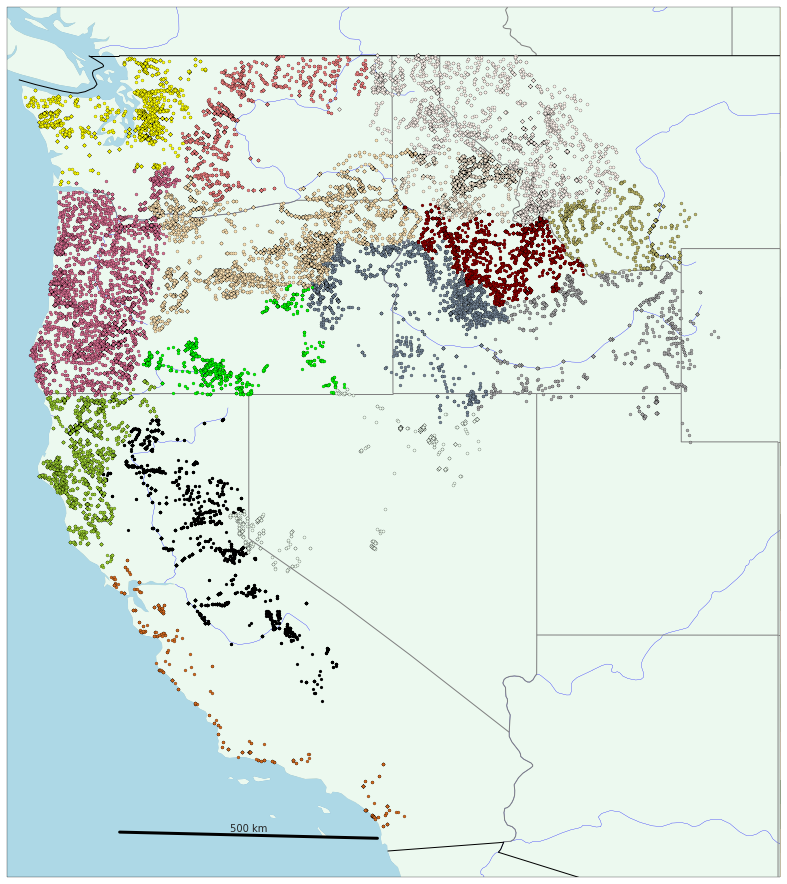

In [150]:
fig = plt.figure(figsize=(30,16))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-90, -80, 34, 38]) # TVA area
    ax.set_extent([-125, -109, 32, 50])  # Western US
    #ax.set_extent([-125, -115, 45, 49.5])  # Washington

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
    ax.add_feature(rivers_lakes, edgecolor='blue')
    
    # -------------------- cycle throug and plot all NorWest data --------------
    i = 0
    for folderx in directory_regions:
        if folderx != 'stream_temps':
            i = i + 2 # for color
            folderx2 = dir_top + folderx + '/'
            filesx =  [f for f in os.listdir(folderx2) if isfile(join(folderx2, f))]

            # ---------- read in shapefile ----------
            site_x = geopandas.GeoDataFrame.from_file(folderx2)    
            site_x = site_x.to_crs(crs={'proj': 'latlon'})
            centroidseries = site_x['geometry'].centroid
            site_x_lon,site_x_lat = [list(t) for t in zip(*map(getXY, centroidseries))]
            plt.plot(site_x_lon, site_x_lat,'s',zorder=4, markersize=3,markeredgewidth=0.2,
                 marker='o',markeredgecolor='black', color=col_names[i])
            print(folderx, 'length: ')
            
            

    scale_bar(ax, 500, 10, 0, 20)
    
    plt.show()


if __name__ == '__main__':
    main()



In [ ]:
# --------------------------------------------------------------------------------------------------------------
#
#               OLD CODE
#
# --------------------------------------------------------------------------------------------------------------

In [ ]:
# ----------- script to read in folders - could use to save paths ------

shp_files = pd.DataFrame()

for folderx in directory_regions:
    folderx2 = dir_top + folderx + '/'
    filesx =  [f for f in os.listdir(folderx2) if isfile(join(folderx2, f))]
    #print(folderx2)
    for filesx2 in filesx:
        if filesx2.endswith('.shp'):
            filesx3 = filesx2.split('.')[0]
            pathx = folderx2 + filesx3
            dfx = pd.DataFrame([filesx3,pathx])
            #print(filesx3)